**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement two clustering models- K-Means and Hierarchical Clustering to segment customers based on their online transactions**



**Guidelines**
* Download `OnlineRetailData.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

#### Read the content of the `OnlineRetailData.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.  

> **Q1.5.** Build a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.

> **Q1.6.** Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster

### Q1.1. Preprocessing the Dataset

In [1]:
# Q1.1. Preprocess and clean the dataset (Note: Make sure to document your preprocessing step): This step should include the following:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')


In [2]:
#Reading the Dataset
OnlineRD = pd.read_csv("OnlineRetailData.csv", index_col='CustomerID')
OnlineRD.head(10)

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
12352.0,1545.41,95,35
12353.0,89.00,4,203
12354.0,1079.40,58,231
12355.0,459.40,13,213


In [3]:
OnlineRD.shape

(4293, 3)

### Checking for missing values

In [4]:
OnlineRD.isnull().sum()

Amount       0
Frequency    0
Recency      0
dtype: int64

### Checking for irregualarities
The amount column had some negative valyes which will need to be removed.

In [5]:
filtered_amounts = OnlineRD[OnlineRD['Amount'] < 0]['Amount']
print(filtered_amounts)

CustomerID
12503.0   -1.126000e+03
12505.0   -4.500000e+00
12605.0   -7.500000e+00
12666.0   -2.274400e+02
12870.0   -1.490000e+01
12943.0   -3.750000e+00
13154.0   -6.118600e+02
13672.0   -7.146000e+01
13693.0   -3.200000e+01
13829.0   -1.020000e+02
13958.0   -1.024500e+02
14119.0   -1.990000e+01
14213.0   -1.192200e+03
14437.0   -4.340000e+01
14627.0   -2.185000e+01
14679.0   -2.550000e+00
14777.0   -1.745000e+01
15369.0   -1.592490e+03
15590.0   -3.019000e+01
15638.0   -9.400000e+01
15728.0   -1.348000e+02
15802.0   -4.514200e+02
15823.0   -8.407600e+02
16061.0   -2.995000e+01
16138.0   -7.950000e+00
16252.0   -2.950900e+02
16262.0   -3.165000e+01
16428.0   -2.950000e+00
16454.0   -8.150000e+00
16546.0   -9.593000e+01
16579.0   -3.060000e+01
16995.0   -1.250000e+00
17065.0   -1.123500e+02
17307.0   -1.526400e+02
17448.0   -4.287630e+03
17547.0   -1.180000e+01
17548.0   -1.414800e+02
17603.0   -1.165300e+03
17820.0   -2.405000e+01
18072.0   -5.329071e-15
18141.0   -3.540000e+01
18256

In [6]:
OnlineRD = OnlineRD.drop(OnlineRD[OnlineRD['Amount'] < 0].index)

In [7]:
OnlineRD.shape

(4251, 3)

#### Checking and dealing with Outliers

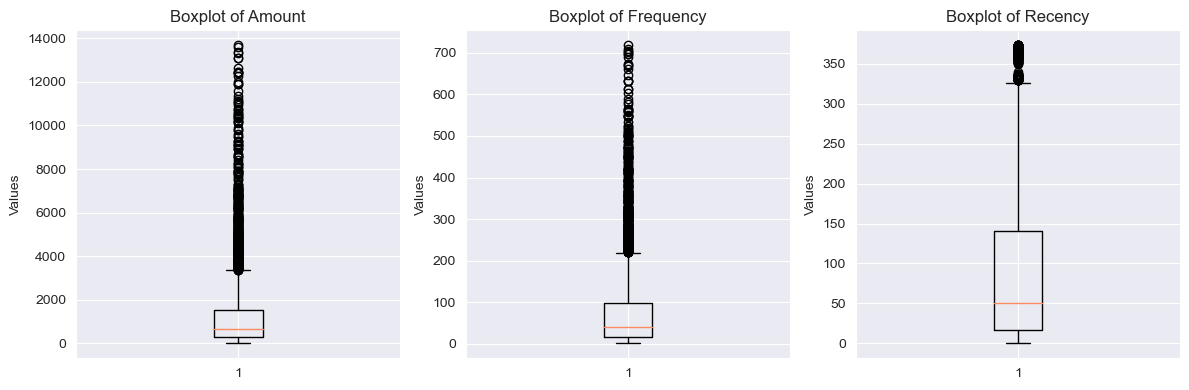

In [8]:
# Visualize the data using separate boxplots
variables = ['Amount', 'Frequency', 'Recency']

plt.figure(figsize=(12, 4))

for i, variable in enumerate(variables):
    plt.subplot(1, 3, i+1)
    plt.boxplot(OnlineRD[variable])
    plt.title(f'Boxplot of {variable}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(OnlineRD)

# Define a threshold for outlier detection
threshold = 3

# Filter OnlineRD to remove outliers based on z-score for each column
OnlineRD = OnlineRD[(z_scores < threshold).all(axis=1) & (z_scores > -threshold).all(axis=1)]
OnlineRD


,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309
...,...,...,...
18278.0,173.90,9,73
18280.0,180.60,10,277
18281.0,80.82,7,180


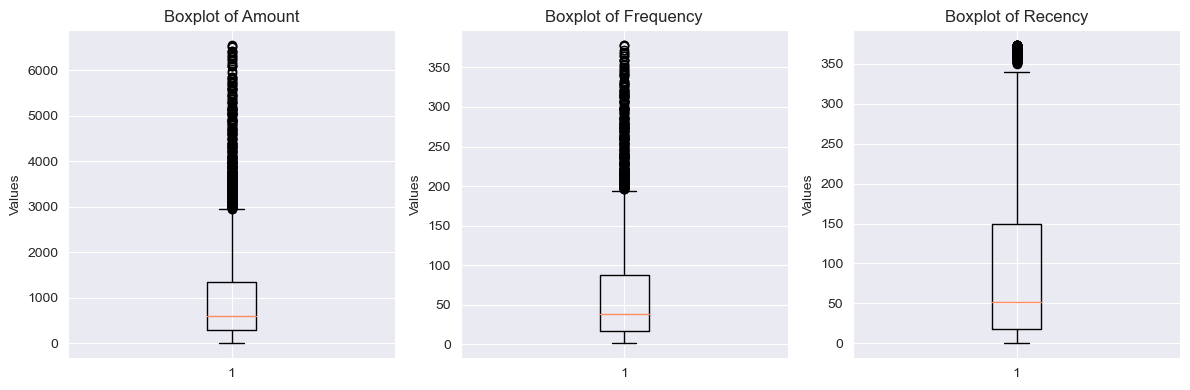

In [10]:
# Visualize the data using separate boxplots
variables = ['Amount', 'Frequency', 'Recency']

plt.figure(figsize=(12, 4))

for i, variable in enumerate(variables):
    plt.subplot(1, 3, i+1)
    plt.boxplot(OnlineRD[variable])
    plt.title(f'Boxplot of {variable}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [11]:
OnlineRD.shape

(4071, 3)

### Q1.2. Visualize the dataset

In [12]:
# Q1.2. Visualize the dataset

<Axes: title={'center': 'Frequency Vs. Recency'}, xlabel='Frequency', ylabel='Recency'>

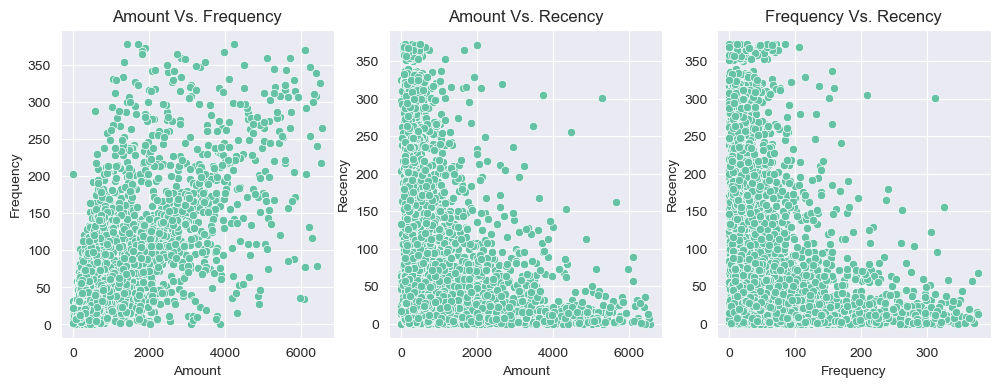

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Amount Vs. Frequency")
sns.scatterplot(x="Amount", y="Frequency", data=OnlineRD)

plt.subplot(1, 3, 2)
plt.title("Amount Vs. Recency")
sns.scatterplot(x="Amount", y="Recency", data=OnlineRD)

plt.subplot(1, 3, 3)
plt.title("Frequency Vs. Recency")
sns.scatterplot(x="Frequency", y="Recency", data=OnlineRD)

C:\Users\student75\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


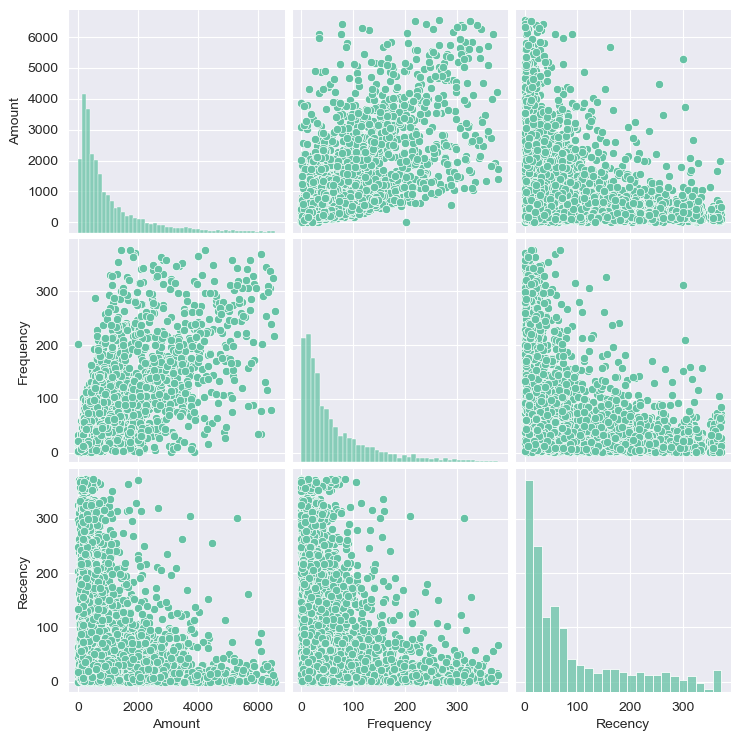

In [14]:
sns.pairplot(OnlineRD)

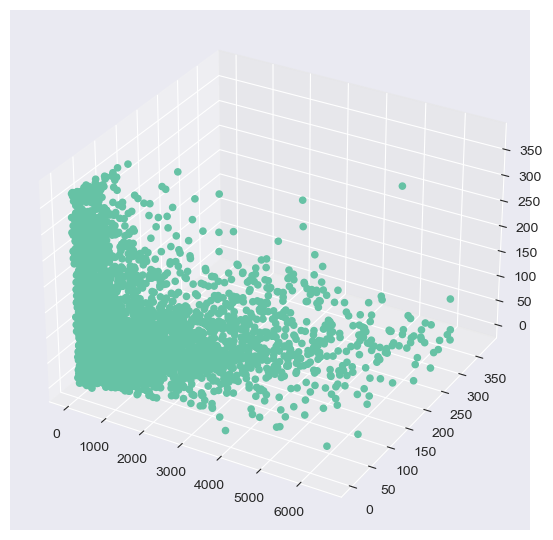

In [15]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(OnlineRD.iloc[:, 0], OnlineRD.iloc[:, 1], OnlineRD.iloc[:, 2], alpha=1)
plt.show()

### Q1.3. Discussing the preliminary observations about the dataset.

In [16]:
# Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability

In [17]:
OnlineRD.describe()

,Amount,Frequency,Recency
count,4071.000000,4071.000000,4071.000000
mean,1039.842136,65.020634,93.973962
std,1150.464064,70.438623,100.147487
min,0.000000,1.000000,0.000000
25%,285.025000,17.000000,18.000000
50%,605.630000,38.000000,52.000000
75%,1351.345000,88.000000,149.000000
max,6546.580000,378.000000,373.000000


### 1. The scatter plot 

Shows three scatter plots comparing different variables: Amount, Frequency, and Recency.

Amount vs Frequency suggests that most data points have low values for both variables, as they are clustered at the lower end of the axes. This means that there is a negative relationship between amount and frequency, or that higher amounts are associated with lower frequencies.

Amount vs Recency does not show any clear trend or correlation between the two variables, as the data points are scattered randomly across the plot. This means that there is no relationship between amount and recency, or that the amount does not depend on how recent the occurrence was.

Frequency vs Recency also shows that most data points have low values for both variables, as they are concentrated at the lower end of the axes. This means that there is a negative relationship between frequency and recency, or that higher frequencies are associated with lower recencies.

### For the pair plot 
The histogram shows us a right-skewed distribution, with some noticeable peaks. 
There doesn't appear to be a strong correlation between Amount and Frequency, nor between Amount and Recency.
The distribution of Recency is more evenly spread, but no specific patterns emerge.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

OnlineRD_scaled = scaler.fit_transform(OnlineRD)
OnlineRD_scaled.shape

(4071, 3)

### Q1.4. Building a clustering model using K-Means clustering algorithm to segment the customers based on recency, frequency, and amount.

In [20]:
variations = []
range_n_clusters = range(2,8)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(OnlineRD_scaled)
    
    variations.append(kmeans.inertia_)

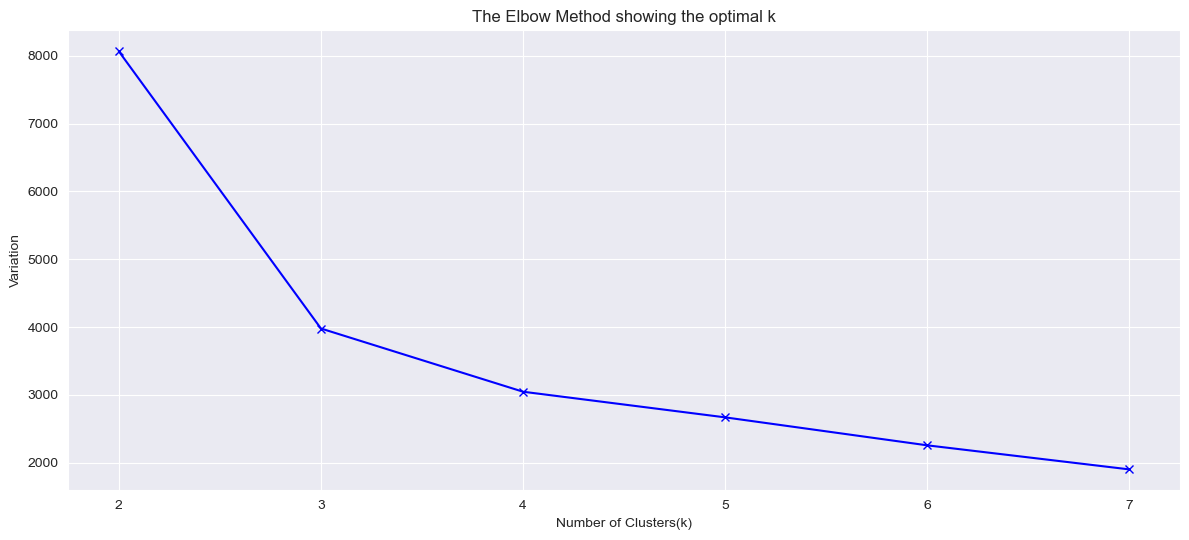

In [21]:
plt.plot(range_n_clusters, variations, 'bx-')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Variation')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(OnlineRD_scaled)

KMeans(max_iter=50, n_clusters=3)

In [23]:
OnlineRD['km_clusters'] = kmeans.labels_

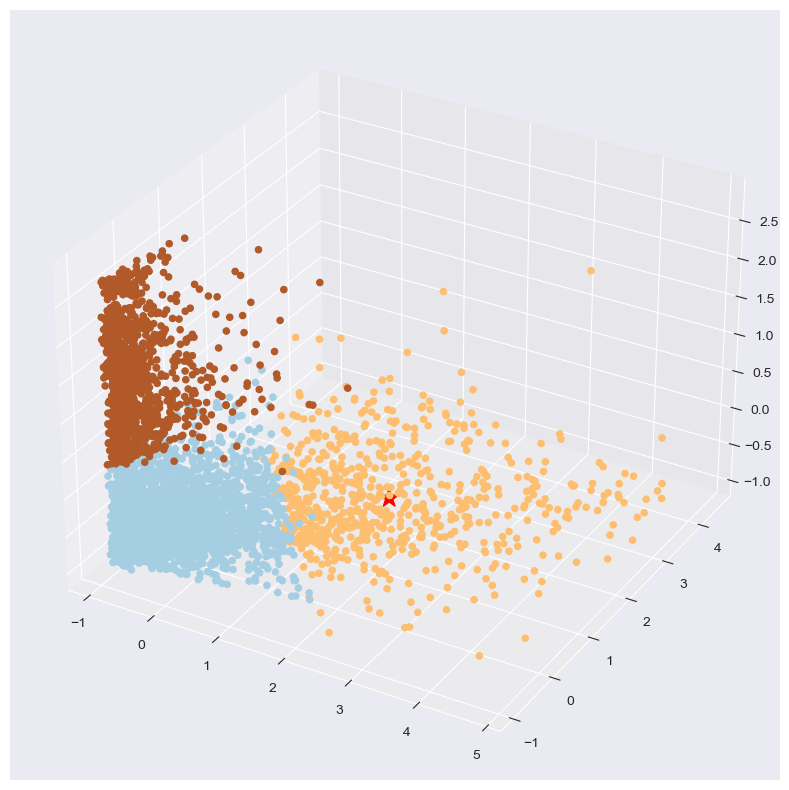

In [24]:
plt.rcParams["figure.figsize"] = [12.00, 5.50]
plt.rcParams["figure.autolayout"] = True
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(OnlineRD_scaled[:, 0], OnlineRD_scaled[:, 1], OnlineRD_scaled[:, 2], c=kmeans.labels_, alpha=1, cmap='Paired')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, alpha=1)
plt.show()

In [25]:
OnlineRD['km_clusters'] = kmeans.labels_

In [26]:
OnlineRD.head()

,Amount,Frequency,Recency,km_clusters
CustomerID,,,,
12346.0,0.00,2,325,2
12347.0,4310.00,182,1,1
12348.0,1797.24,31,74,0
12349.0,1757.55,73,18,0
12350.0,334.40,17,309,2


### Q1.5. Building a clustering model using hierarchical clustering algorithm to segment the customers based on recency, frequency, and amount.


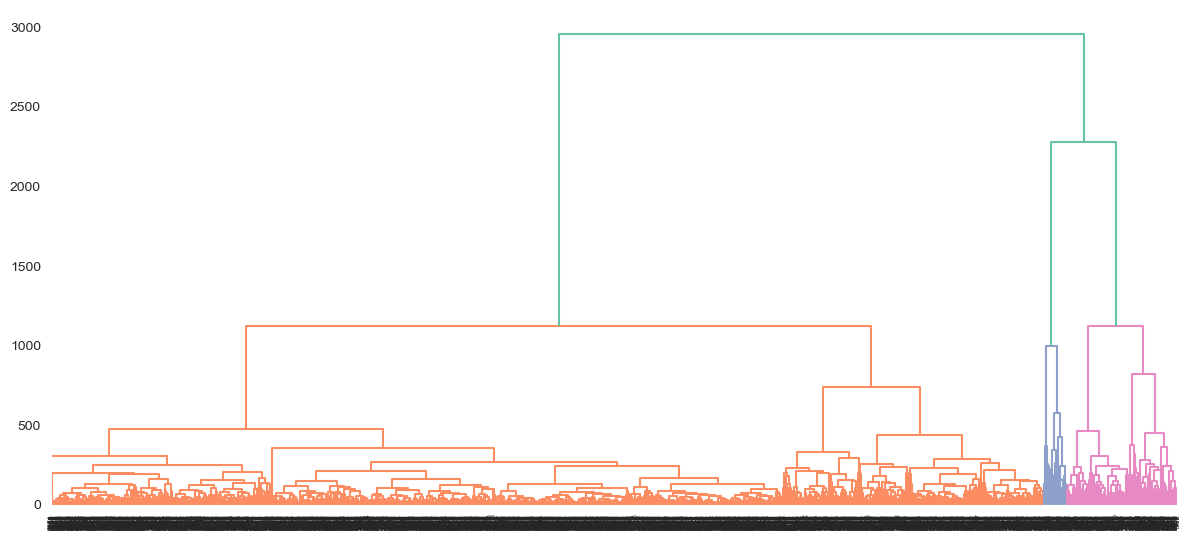

In [28]:
mergings = linkage(OnlineRD, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [32]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
OnlineRD['h_clusters'] = cluster_labels
OnlineRD.head()

,Amount,Frequency,Recency,km_clusters,h_clusters
CustomerID,,,,,
12346.0,0.00,2,325,2,0
12347.0,4310.00,182,1,1,1
12348.0,1797.24,31,74,0,0
12349.0,1757.55,73,18,0,0
12350.0,334.40,17,309,2,0


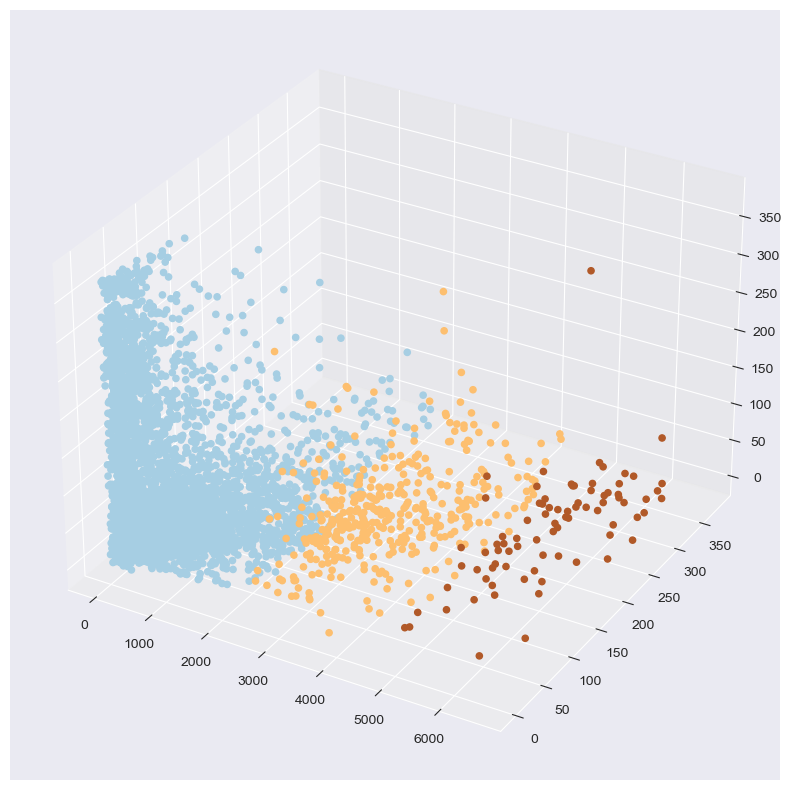

In [34]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(OnlineRD.iloc[:, 0], OnlineRD.iloc[:, 1], OnlineRD.iloc[:, 2], c=OnlineRD['h_clusters'], alpha=1, cmap='Paired')
plt.show()

### Q1.6. Based on the clustering, describe the customers in each cluster


In [ ]:
# Q1.6. Based on the clustering on Q1.4 and Q1.5, describe the customers in each cluster

### Q1.4 K-Means
Brown Cluster:
The brown cluster appears to be located in the upper left portion of the plot and customers within this cluster share similar features. They are high-value customers who make frequent purchases.

Blue Cluster:
The blue cluster is concentrated in the lower left part of the plot and customers in this group exhibit distinct features from the brown cluster. They are price-sensitive customers who seek discounts or deals.

Yellowish Points (Transition Zone):
The yellowish points fill the space between the brown and blue clusters.
These customers exhibit a mix of features. They represent a transition zone where customer characteristics overlap.

The red asterisks mark the centroids of each cluster.

### Q1.5 Hierarchical Cluster
Blue Cluster:  High-value customers with frequent shopping and significant spending.

Orange Cluster: Regular shoppers with moderate spending.

Brown Cluster: New or infrequent shoppers with lower total spending.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

### 1. Reflection of Experience:

After performing this activity, imprting the data, and doing preprocessing particular removing outliers. Then applying clustering algorithms required a good understanding of both the dataset and the clustering techniques. Implementing the code provided me with an opportunity to apply theoretical knowledge in a practical context, helping to reinforce my understanding.

### 2. Importance of Learning This Activity:

One importance i learnt that when we segment customers based on transactional data, businesses can understand how crucial it is because customer segmentation helps in understanding customer behavior and preferences and that can help in personalized marketing strategies. Clustering techniques like K-Means and Hierarchical Clustering provide insights into customer segments, allowing businesses to tailor their approaches accordingly. 

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab4.ipynb** to the **Lab 4 - Unsupervised Learning - K-Means Clustering and Hierarchical Clustering (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                          | Good                                               | Average                                                    | Below Average                                               | Poor                                                         | No Attempt                                                  |
| ----------------------------------------- | --------------------------------------------------- | --------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.2         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.3         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.4         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.5         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 1:** Activity-Question 1.6         | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question                      |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection                     |
